In [1]:
from pathlib import Path

from rljax.algorithm import SAC_Discrete
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'TBT_TBF_data.csv'))
data = raw.process()

In [3]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [4]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 25000
SEED = 0
DAYS = 1
DAY = 2340

env = Env(
    data,
    no_trade_period=5,
    fixed_buy_cost=0,
    fixed_sell_cost=0,
    steps=DAY*DAYS,
    reward_func=return_rewards
)
env_test = env.copy_env()

algo = SAC_Discrete(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=5000,
    seed=SEED,
)
trainer.train()

Num steps: 5000     Return: -0.6    Time: 0:01:17
Num steps: 10000    Return: -20.1   Time: 0:02:29
Num steps: 15000    Return: -12.9   Time: 0:03:42
Num steps: 20000    Return: -23.9   Time: 0:04:59
Num steps: 25000    Return: -24.9   Time: 0:06:44


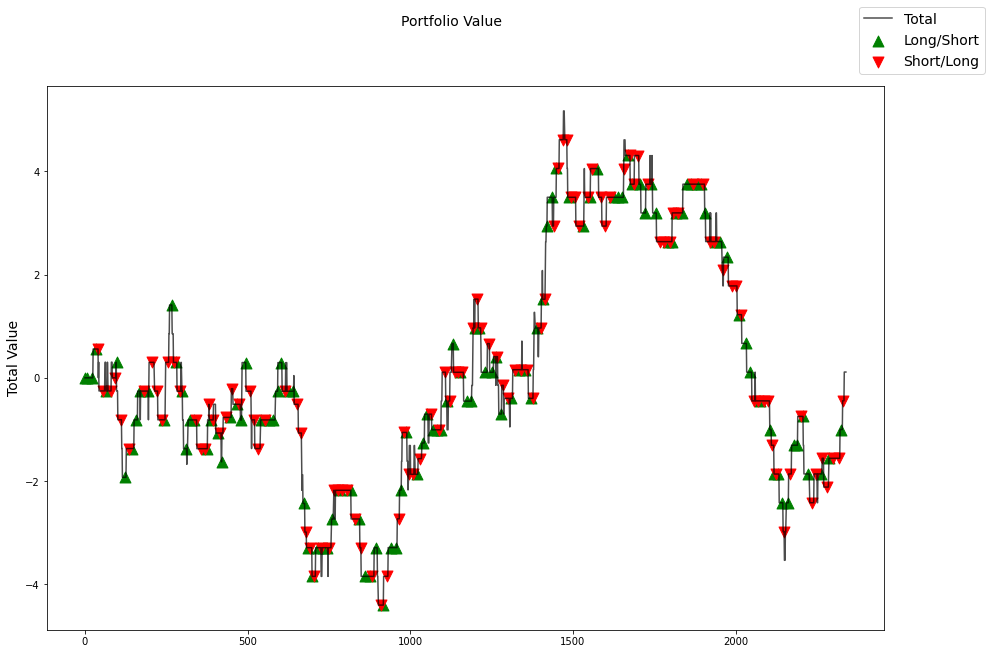

In [5]:
env.plot()

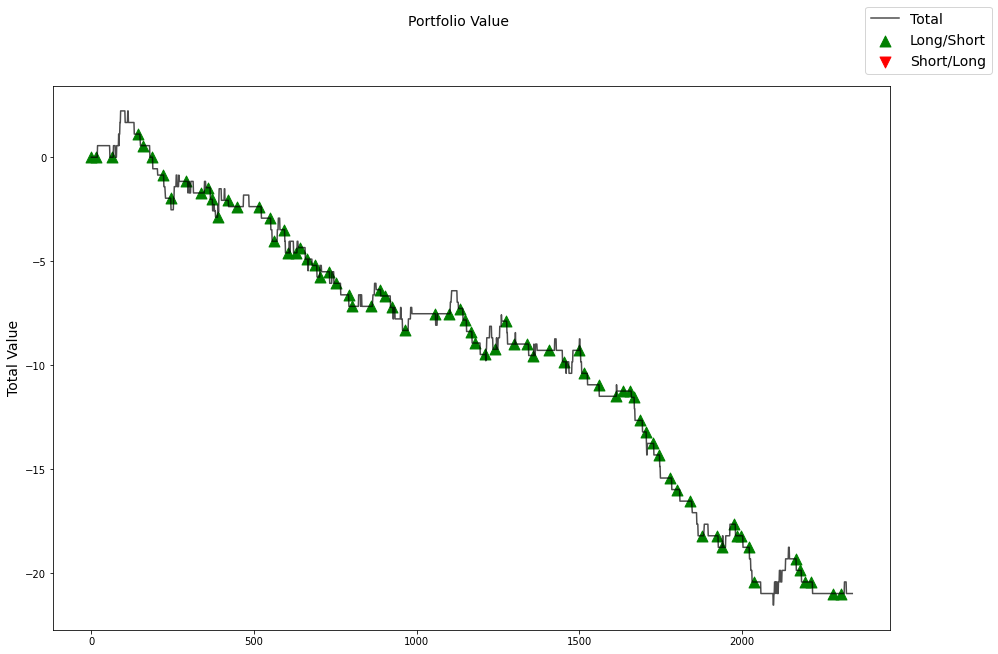

In [6]:
env_test.plot()

In [14]:
env_test.absolute_position

[1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,


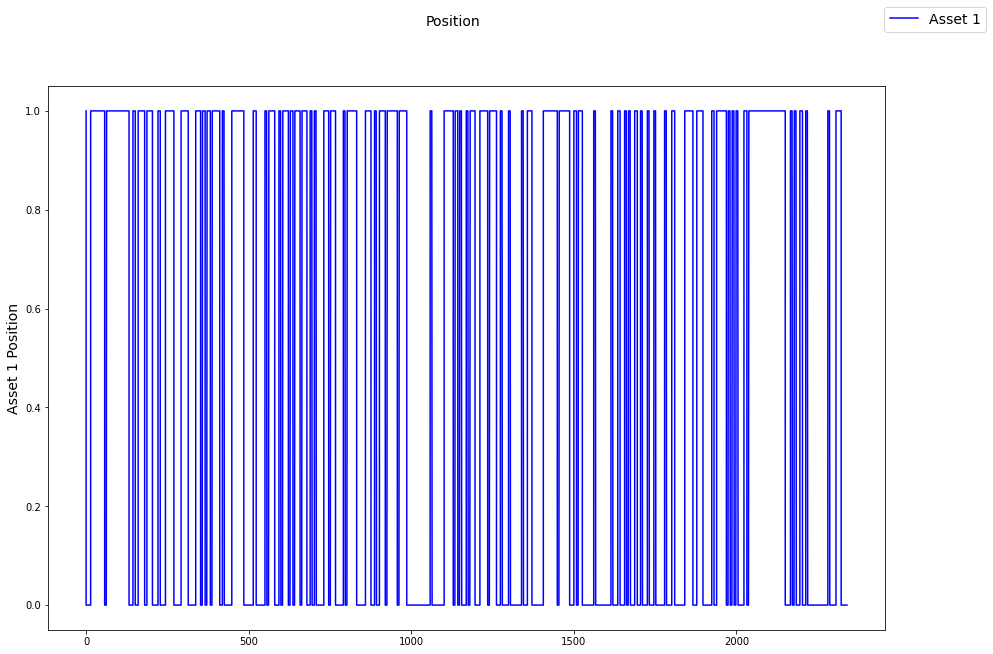

In [7]:
env_test.plot('position_history')

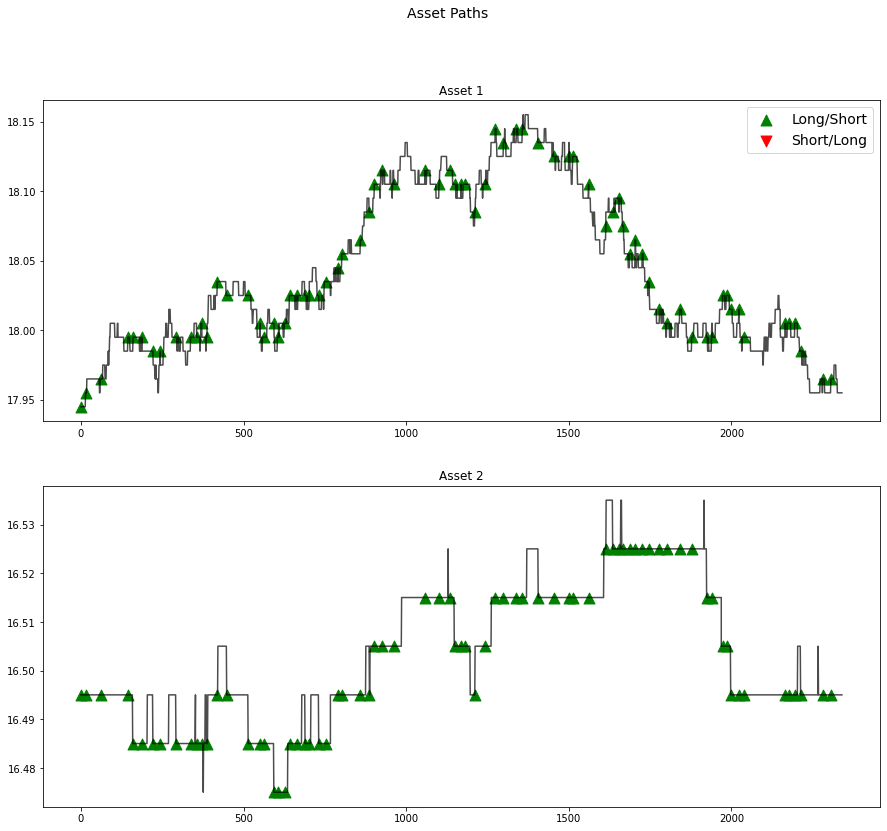

In [8]:
env_test.plot('asset_paths')

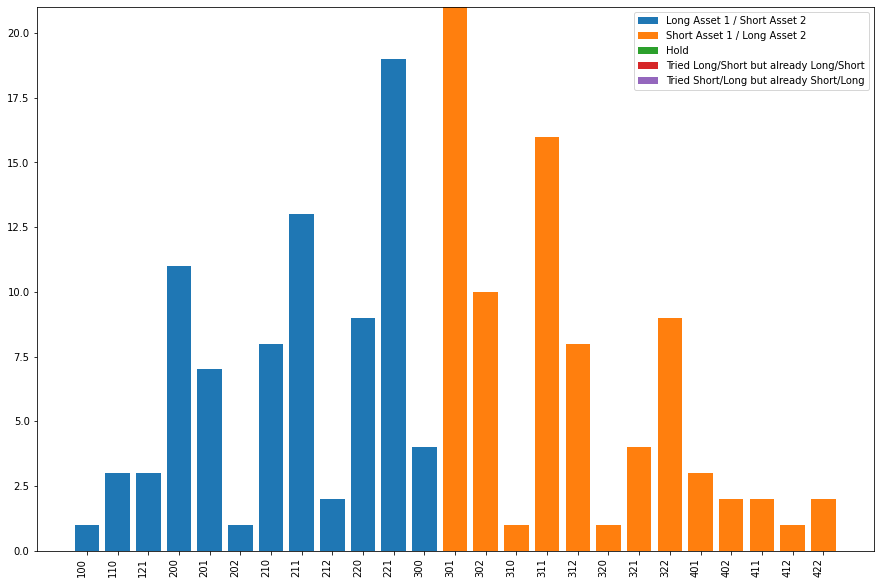

In [9]:
env_test.plot('summarize_decisions')

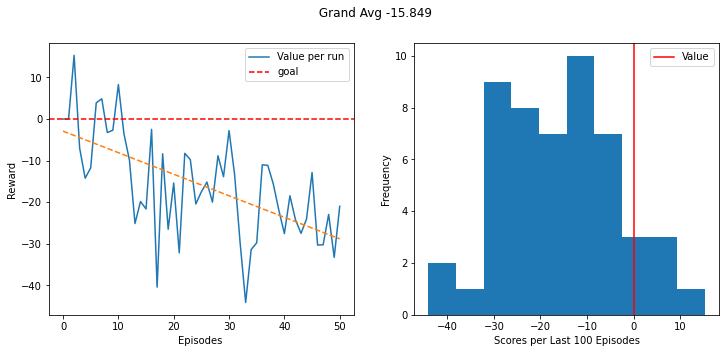

In [10]:
env_test.plot('learning_progress')

In [11]:
env.portfolio_values

[0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.5575689991636636,
 0.00031070994646142935,
 0.30343286817628723,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 -0.2541361309873764,
 0.3028117943816824,
 0.3028117943816824,
 -0.2541361309873764,
 -0

In [12]:
env.portfolio_history

[[-500, 1000, -500],
 [0.0, 0, 0],
 [-500.0, 1000, -500],
 [0.0, 0, 0],
 [-500.0, 1000, -500],
 [0.5575689991636636, 0, 0],
 [-499.44243100083634, 1000, -500],
 [500.00031070994646, -1000, 500],
 [-0.2541361309873764, 0, 0],
 [499.7458638690126, -1000, 500],
 [-500.25413613098726, 1000, -500],
 [-0.25413613098726273, 0, 0],
 [499.74586386901274, -1000, 500],
 [-0.00012670910206225017, 0, 0],
 [499.999873290898, -1000, 500],
 [-500.25426284008927, 1000, -500],
 [-0.8112107654583269, 0, 0],
 [499.1887892345417, -1000, 500],
 [-1.9257273438926177, 0, 0],
 [-501.9257273438926, 1000, -500],
 [-1.3690894368511408, 0, 0],
 [498.63091056314886, -1000, 500],
 [-501.369089436851, 1000, -500],
 [-0.8127612031930767, 0, 0],
 [-500.8127612031931, 1000, -500],
 [-0.25674229855030717, 0, 0],
 [-500.2567422985503, 1000, -500],
 [-0.25674229855042086, 0, 0],
 [499.7432577014496, -1000, 500],
 [-0.25674229855030717, 0, 0],
 [-500.2567422985503, 1000, -500],
 [0.2995859351076433, 0, 0],
 [500.29958593510

In [13]:
env.portfolio_history

[[-500, 1000, -500],
 [0.0, 0, 0],
 [-500.0, 1000, -500],
 [0.0, 0, 0],
 [-500.0, 1000, -500],
 [0.5575689991636636, 0, 0],
 [-499.44243100083634, 1000, -500],
 [500.00031070994646, -1000, 500],
 [-0.2541361309873764, 0, 0],
 [499.7458638690126, -1000, 500],
 [-500.25413613098726, 1000, -500],
 [-0.25413613098726273, 0, 0],
 [499.74586386901274, -1000, 500],
 [-0.00012670910206225017, 0, 0],
 [499.999873290898, -1000, 500],
 [-500.25426284008927, 1000, -500],
 [-0.8112107654583269, 0, 0],
 [499.1887892345417, -1000, 500],
 [-1.9257273438926177, 0, 0],
 [-501.9257273438926, 1000, -500],
 [-1.3690894368511408, 0, 0],
 [498.63091056314886, -1000, 500],
 [-501.369089436851, 1000, -500],
 [-0.8127612031930767, 0, 0],
 [-500.8127612031931, 1000, -500],
 [-0.25674229855030717, 0, 0],
 [-500.2567422985503, 1000, -500],
 [-0.25674229855042086, 0, 0],
 [499.7432577014496, -1000, 500],
 [-0.25674229855030717, 0, 0],
 [-500.2567422985503, 1000, -500],
 [0.2995859351076433, 0, 0],
 [500.29958593510